In [11]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('iot_devices_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 298 entries, ack to device_category
dtypes: float64(80), int64(217), object(1)
memory usage: 2.3+ MB


In [4]:
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
ack,0,0.0
tcp_analysis_duplicate_ack,0,0.0
ssl_resp_bytes_thirdQ,0,0.0
ssl_resp_bytes_sum,0,0.0
ssl_resp_bytes_stdev,0,0.0
...,...,...
packet_inter_arrivel_B_max,0,0.0
packet_inter_arrivel_B_firstQ,0,0.0
packet_inter_arrivel_B_entropy,0,0.0
packet_inter_arrivel_B_avg,0,0.0


<AxesSubplot:>

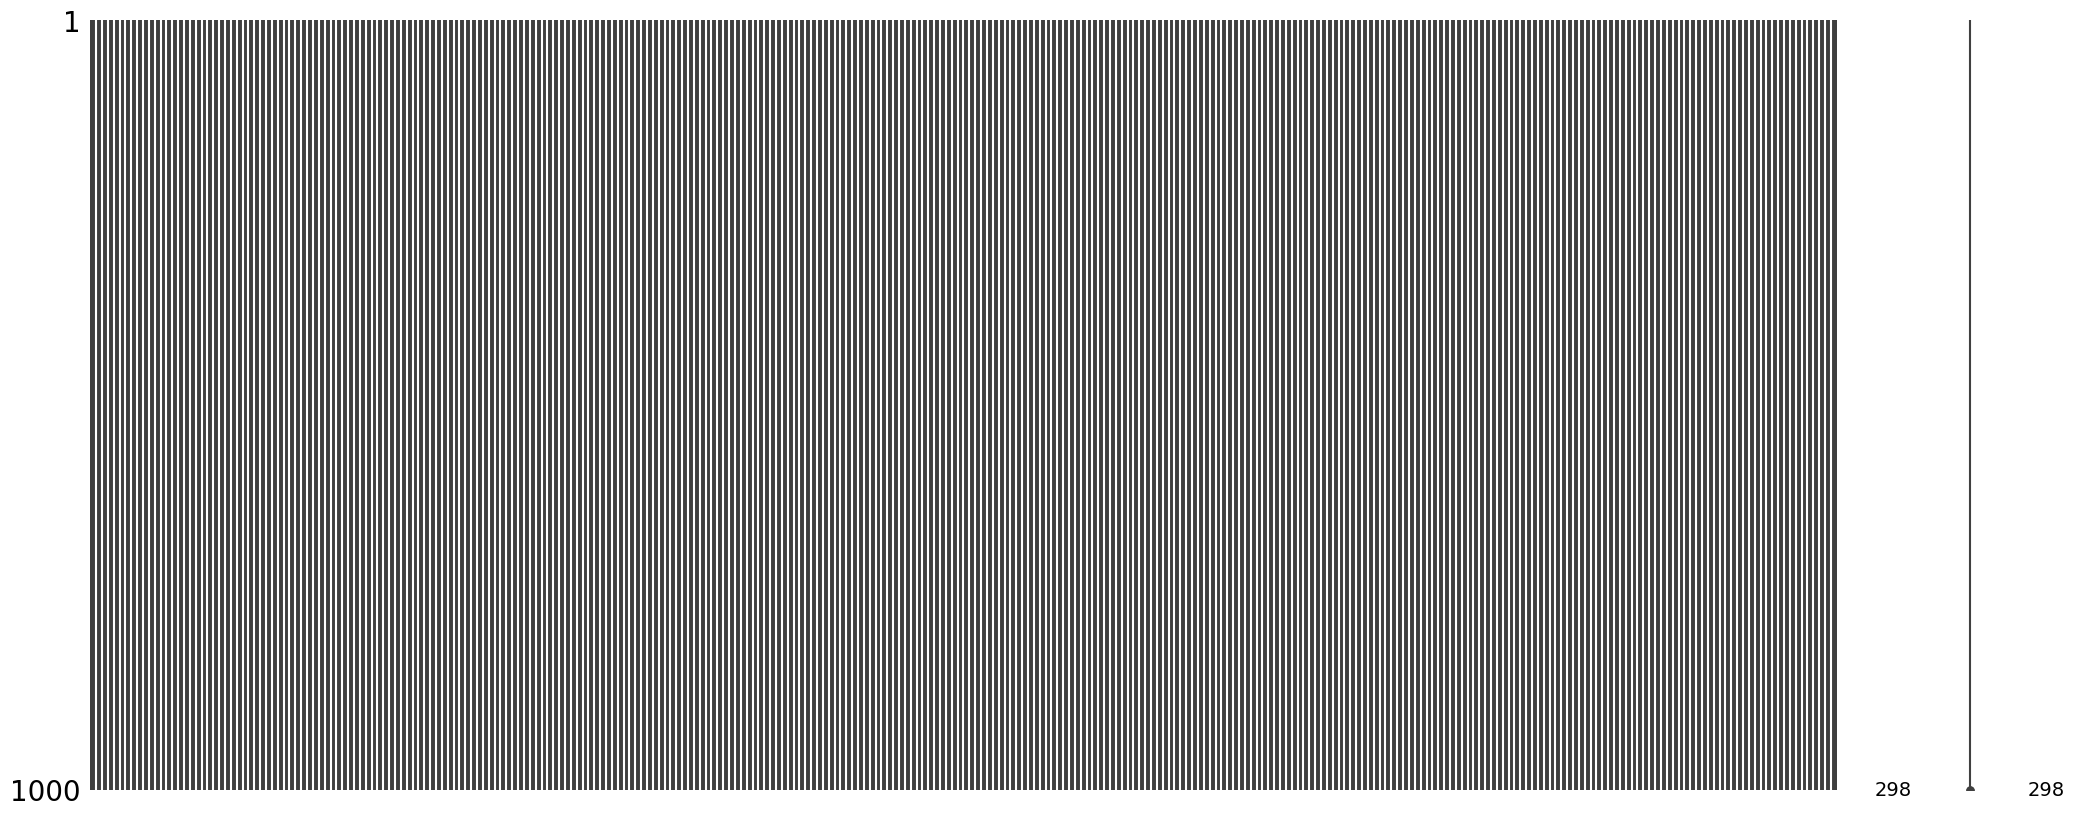

In [5]:
msno.matrix(df)

In [6]:
df.shape

(900, 298)

In [13]:
df["device_category"].unique()

array(['baby_monitor', 'lights', 'motion_sensor', 'security_camera',
       'smoke_detector', 'socket', 'thermostat', 'TV', 'watch',
       'water_sensor'], dtype=object)

In [7]:
from sklearn import preprocessing
# creating initial dataframe

le = preprocessing.LabelEncoder()
df['device_category'] = le.fit_transform(df['device_category'])
df

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,1
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,1
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,1
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,1
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,264,116,148,212053,202036,20.169310,10017,0,0,250.1856,...,0,0,0,0,1,0,0,0,0,8
896,24,13,11,7749,5364,2.249056,2385,0,0,300.6818,...,0,0,0,1,0,0,0,0,0,8
897,20,9,11,7091,5336,3.040454,1755,0,0,300.9433,...,0,0,0,1,0,0,0,0,0,8
898,30,14,16,7882,5789,2.765885,2093,0,0,244.8219,...,0,0,0,0,1,0,0,0,0,8


In [8]:
df["device_category"].unique()

array([1, 2, 3, 4, 5, 6, 7, 0, 8])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 298 entries, ack to device_category
dtypes: float64(123), int32(1), int64(174)
memory usage: 2.0 MB


In [10]:
df.to_csv('test_num.csv')

In [10]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance

In [14]:
df = pd.read_csv('train_num.csv')

In [15]:
train, val = train, val = train_test_split(df, test_size=0.20, random_state=11)

x_train = train.drop(columns=["device_category"])
y_train = train["device_category"].values

x_val = val.drop(columns=["device_category"])
y_val = val["device_category"].values

In [16]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [17]:
x_train.shape

(800, 298)

In [18]:
x_val.shape

(200, 298)

In [19]:
xgb.score(x_train, y_train)

1.0

In [20]:
xgb.score(x_val, y_val)

0.995

In [21]:
xgb.feature_importances_

array([0.04554453, 0.        , 0.        , 0.        , 0.00270568,
       0.        , 0.00582086, 0.00272765, 0.        , 0.        ,
       0.00179823, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00380187, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<BarContainer object of 298 artists>

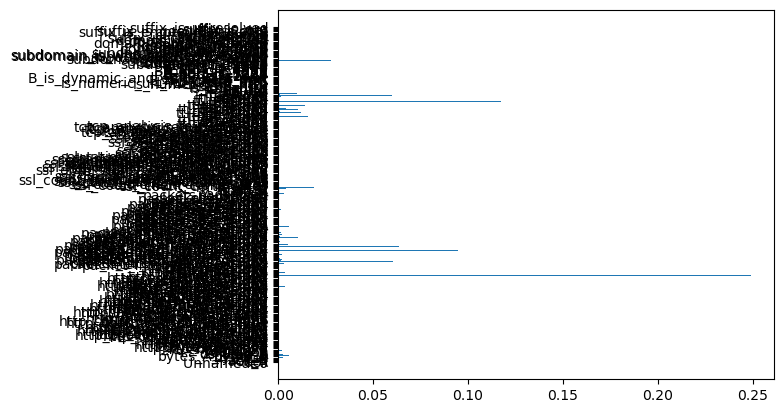

In [22]:
plt.barh(x_train.columns, xgb.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

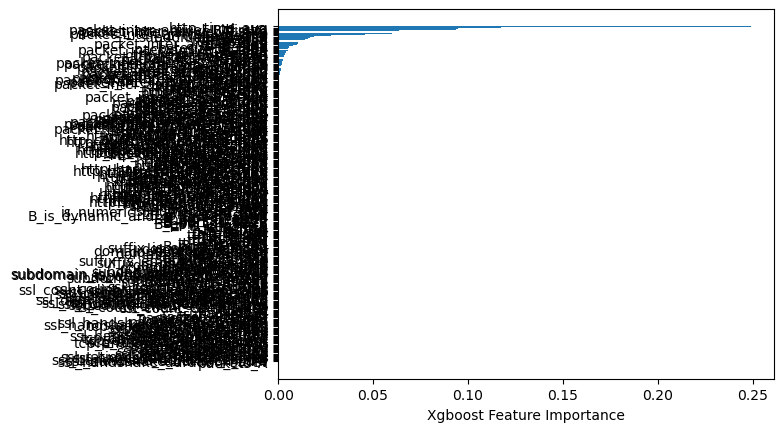

In [23]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [24]:
feature_importances = pd.DataFrame(xgb.feature_importances_, 
                                   index = x_train.columns,  
                                   columns= ['importance']).sort_values('importance', ascending=False)

In [25]:
feature_importances

,importance
http_time_avg,0.248983
ttl_avg,0.117406
packet_inter_arrivel_B_firstQ,0.094569
packet_inter_arrivel_A_sum,0.093778
packet_inter_arrivel_B_min,0.063541
...,...
packet_size_B_median,0.000000
packet_size_B_min,0.000000
packet_size_B_stdev,0.000000
packet_size_B_sum,0.000000


In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Load data
data = pd.read_csv('train_num.csv')

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

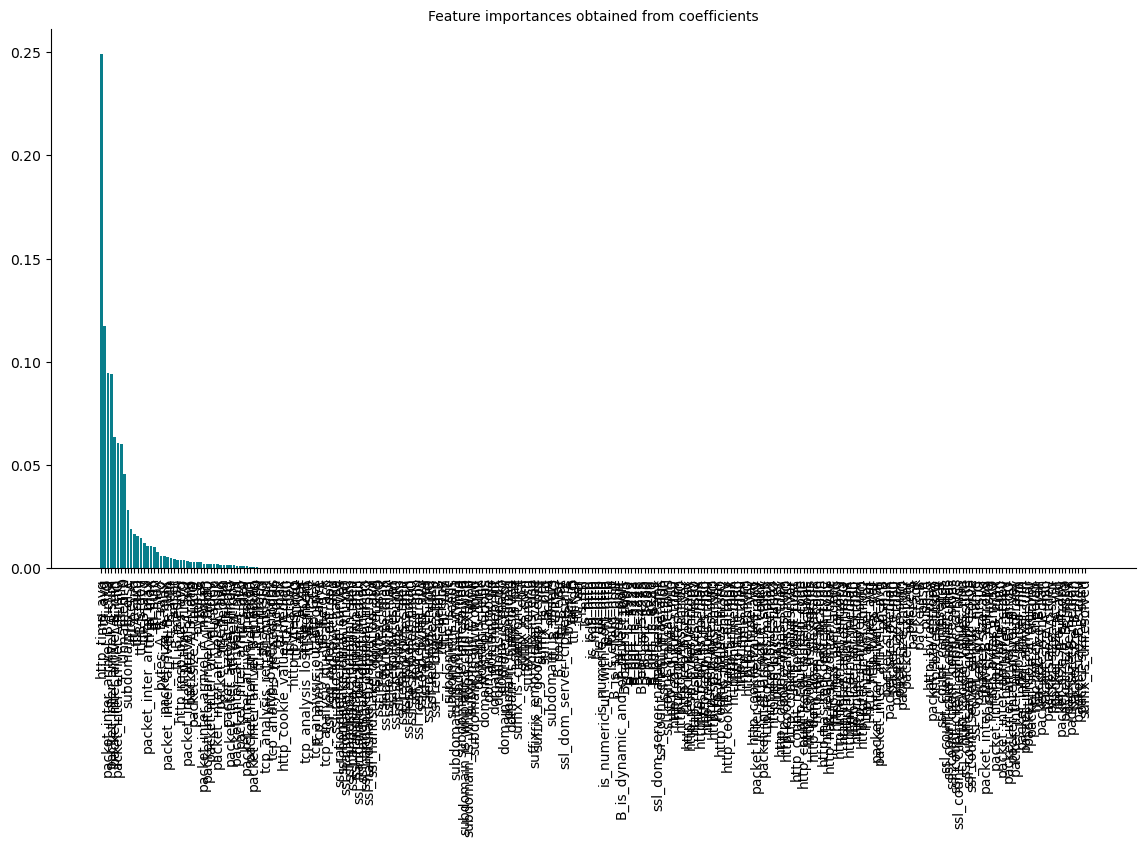

In [32]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

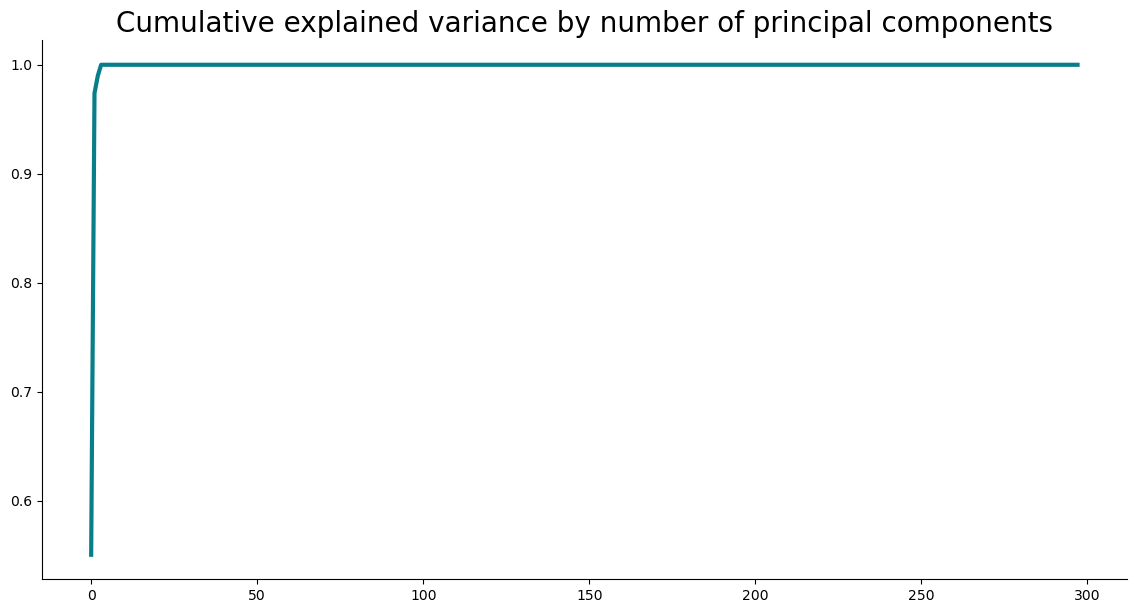

In [31]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()